# Sentiment Analysis for Product Reviews

The analysis review will be made on an People's review of Amazon Products with tools as Pandas, and from NLTK as Lemmatizing, StopWords, Vader, Punkt. 

### References
* [Datasets for Sentiment Analysis](https://zenodo.org/records/10157504)

In [16]:
import pkg_resources
import warnings

warnings.filterwarnings('ignore')

installed_packages = [package.key for package in pkg_resources.working_set]
IN_COLAB = 'google-colab' in installed_packages

In [17]:
!test '{IN_COLAB}' = 'True' && wget  https://github.com/Carlos-SD/NLP/raw/refs/heads/main/requirements.txt && pip install -r requirements.txt

In [19]:
!test '{IN_COLAB}' = 'True' && wget  https://github.com/Carlos-SD/NLP/raw/refs/heads/main/1-Sesion-activity/ProductsReview.csv

### **1.   Load .csv Dataset**

In [20]:
import pandas as pd
import numpy as np

reviews = pd.read_csv('./ProductsReview.csv', sep=',')
reviews.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [21]:
# Clean empty string in ReviewTitle
reviews.dropna(inplace=True)
reviews.ReviewTitle = reviews.ReviewTitle.apply(lambda r: r.strip())
blanks_title = reviews[reviews.ReviewTitle == ''].index
reviews.drop(blanks_title, inplace=True)

# Also clean empty strings in ReviewBody
reviews.ReviewBody = reviews.ReviewBody.apply(lambda r: r.strip())
blanks_body = reviews[reviews.ReviewBody == ''].index
reviews.drop(blanks_body, inplace=True)

In [22]:
# This code checks for rows where 'ReviewTitle' is empty.
print(reviews[reviews.ReviewTitle == ''].index)

print("-" * 60) # Separator

# This code checks for rows where 'ReviewBody' is empty.
print(reviews[reviews.ReviewBody == ''].index)

Index([], dtype='int64')
------------------------------------------------------------
Index([], dtype='int64')


- Since rows have already been cleaned, above code block returns an empty string due of not getting any empty value for ReviewTitle and ReviewBody

### **2.   Download VADER from NLTK**

In [23]:
import nltk

required_resources = [
    ('sentiment/vader_lexicon', 'vader_lexicon'),
    ('tokenizers/punkt', 'punkt'),
    ('tokenizers/punkt_tab', 'punkt_tab'),
    ('corpora/wordnet', 'wordnet'),
    ('corpora/stopwords', 'stopwords'),
]

for resource_path, resource_name in required_resources:
    try:
        nltk.data.find(resource_path)
    except LookupError:
        nltk.download(resource_name)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/carlosfelipe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/carlosfelipe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Combine ReviewTitle and ReviewBody for a more comprehensive sentiment analysis
reviews['full_review'] = reviews.ReviewTitle + ' ' + reviews.ReviewBody
reviews['scores'] = reviews.full_review.apply(lambda r: sid.polarity_scores(r))

reviews.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,full_review,scores
0,Honest review of an edm music lover,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,Honest review of an edm music lover No doubt i...,"{'neg': 0.243, 'neu': 0.645, 'pos': 0.112, 'co..."
1,Unreliable earphones with high cost,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,Unreliable earphones with high cost This earp...,"{'neg': 0.068, 'neu': 0.892, 'pos': 0.04, 'com..."
2,Really good and durable.,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,"Really good and durable. i bought itfor 999,I ...","{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp..."
3,stopped working in just 14 days,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,stopped working in just 14 days Its sound qual...,"{'neg': 0.085, 'neu': 0.825, 'pos': 0.09, 'com..."
4,Just Awesome Wireless Headphone under 1000...😉,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,Just Awesome Wireless Headphone under 1000...😉...,"{'neg': 0.075, 'neu': 0.721, 'pos': 0.204, 'co..."


- Turn values into a tag prediction

In [25]:
reviews['compound'] = reviews.scores.apply(lambda s: s['compound'])
reviews['prediction'] = reviews['compound'].apply(lambda c: 'pos' if c > 0 else 'neg')
reviews.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,full_review,scores,compound,prediction
0,Honest review of an edm music lover,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,Honest review of an edm music lover No doubt i...,"{'neg': 0.243, 'neu': 0.645, 'pos': 0.112, 'co...",-0.9370,neg
1,Unreliable earphones with high cost,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,Unreliable earphones with high cost This earp...,"{'neg': 0.068, 'neu': 0.892, 'pos': 0.04, 'com...",-0.2528,neg
2,Really good and durable.,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,"Really good and durable. i bought itfor 999,I ...","{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",0.8173,pos
3,stopped working in just 14 days,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,stopped working in just 14 days Its sound qual...,"{'neg': 0.085, 'neu': 0.825, 'pos': 0.09, 'com...",0.0644,pos
4,Just Awesome Wireless Headphone under 1000...😉,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,Just Awesome Wireless Headphone under 1000...😉...,"{'neg': 0.075, 'neu': 0.721, 'pos': 0.204, 'co...",0.7386,pos


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a 'label' column based on 'ReviewStar'
# Map 1-2 stars to 'neg', 4-5 stars to 'pos', and 3 stars to None for filtering
reviews['label'] = reviews['ReviewStar'].apply(lambda x: 'pos' if x >= 4 else ('neg' if x <= 2 else None))

# Filter out neutral reviews (3 stars) for binary classification evaluation
reviews_filtered = reviews.dropna(subset=['label'])

y_true = reviews_filtered.label.values
y_pred = reviews_filtered.prediction.values

acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred)


print(f"Accuracy:\n{acc}\n")
print(f"Classification Report:\n{cr}")
print(f"Confusion Matrix:\n{cm}")

Accuracy:
0.8817019950124688

Classification Report:
              precision    recall  f1-score   support

         neg       0.76      0.81      0.78      3432
         pos       0.93      0.91      0.92      9400

    accuracy                           0.88     12832
   macro avg       0.85      0.86      0.85     12832
weighted avg       0.88      0.88      0.88     12832

Confusion Matrix:
[[2770  662]
 [ 856 8544]]


- The accuracy and f1-score seems to be good for the predictions of the positive and negative values from reviews

### **3.   Predicted Sentiment Distribution Bar Chart**

Now we'll see a bar chart showing the distribution of predicted positive and negative sentiments from the 'prediction' column.


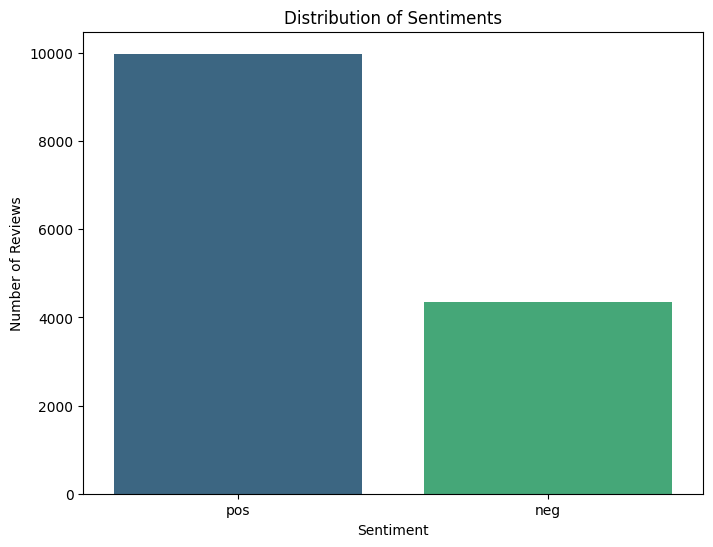

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of 'pos' and 'neg' in the 'prediction' column
sentiment_counts = reviews['prediction'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

# Display the plot
plt.show()

### **3.1  Additional Evaluation Visualizations**

Visual diagnostics to better understand model behavior and rating patterns.


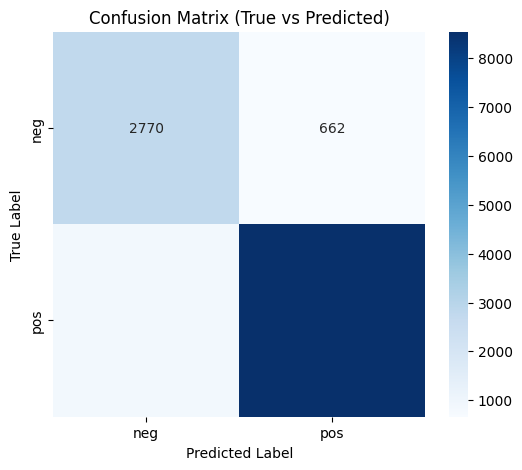

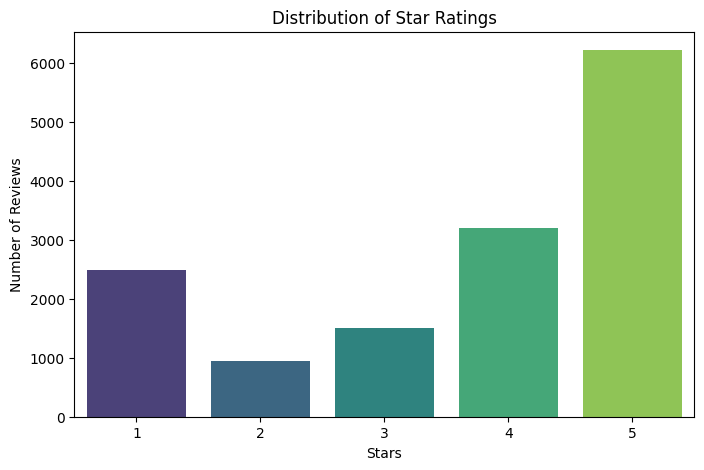

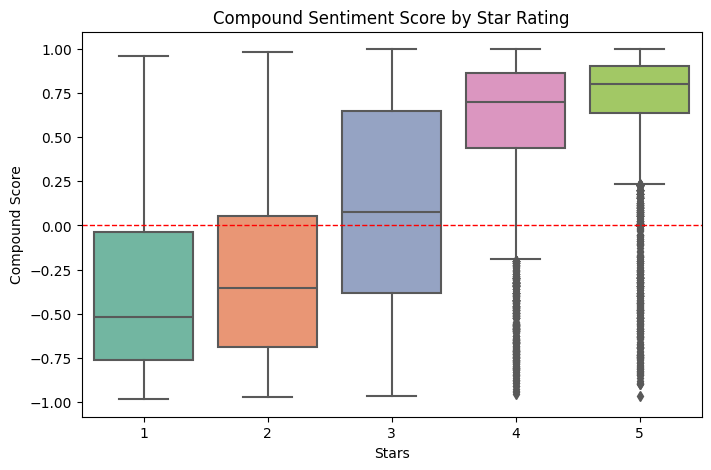

In [35]:
# Confusion matrix as heatmap
cm_df = pd.DataFrame(cm, index=['neg', 'pos'], columns=['neg', 'pos'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (True vs Predicted)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Distribution of original star ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews, x='ReviewStar', order=sorted(reviews['ReviewStar'].unique()), palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.show()

# Relationship between VADER compound score and star rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=reviews, x='ReviewStar', y='compound', palette='Set2')
plt.title('Compound Sentiment Score by Star Rating')
plt.xlabel('Stars')
plt.ylabel('Compound Score')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()


The confusion matrix shows that VADER captures the overall polarity trend reasonably well, with stronger performance on positive reviews. The star-rating distribution is skewed toward high ratings (especially 4-5 stars), and the compound-score boxplot follows the same pattern: median sentiment increases with star level. This indicates a consistent relationship between lexical sentiment and user ratings in the dataset.


### **4.   Most common star rating**

Determine and display the most common star rating given by users from the 'ReviewStar' column.


In [29]:
star_rating_counts = reviews['ReviewStar'].value_counts()
most_frequent_star = star_rating_counts.idxmax()
most_frequent_star_count = star_rating_counts.iloc[0]

print(f"The most frequent star rating is: {most_frequent_star} stars, with {most_frequent_star_count} occurrences.")

The most frequent star rating is: 5 stars, with 6211 occurrences.


### **5.   Analyze Common Complaints in Negative Reviews**

Filter for reviews with 1 or 2 stars. Preprocess the 'ReviewBody' text by tokenizing, removing stopwords, and identifying the most frequent words to find common complaints.



In [30]:
negative_reviews_df = reviews[reviews['ReviewStar'].isin([1, 2])] # Matches negative reviews with 1 or 2 stars of rating

In [31]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

negative_reviews_df = reviews[reviews['ReviewStar'].isin([1, 2])] # Matches negative reviews with 1 or 2 stars of rating

# Create a list of English stopwords and add custom words
stop_words = set(stopwords.words('english')) # Automatic stopwords from nltk
additional_stopwords = ['product', 'phone', 'headphone', 'earphone', 'bought', 'buy', 'good', 'review', 'day', 'days', 'like', 'one', 'use', 'amazon', 'time', 'well', 'really', 'much', 'even', 'get', 'also', 'would', 'can', 'thi', 'im', 'ive', 'great', 'better', 'price', 'quality', 'money', 'back', 'go', 'give', 'dont', 'doesnt', 'got', 'didnt', 'couldnt', 'nothing', 'useless', 'waste']
stop_words.update(additional_stopwords)

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower() # Convert to lowercase
        tokens = word_tokenize(text) # Tokenize text
        # Remove stopwords and lemmatize
        cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
        return cleaned_tokens
    return []

negative_reviews_df['cleaned_review_body'] = negative_reviews_df['ReviewBody'].apply(preprocess_text)


### **6.   Identify common words used on bad reviews**

Filter for reviews with 1 or 2 stars. Preprocess the 'ReviewBody' text by tokenizing, removing stopwords, and identifying the most frequent words to find common complaints.



In [32]:
import collections

negative_reviews_df['cleaned_review_body'] = negative_reviews_df['ReviewBody'].apply(preprocess_text)
all_cleaned_words = [word for sublist in negative_reviews_df['cleaned_review_body'] for word in sublist] # Made a single list

# Use Counter to find the 20 most common words
word_counts = collections.Counter(all_cleaned_words)
most_common_words = word_counts.most_common(20)

print("\nMost Common Words in 1-2 Star Review Bodies (Complaints):\n")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most Common Words in 1-2 Star Review Bodies (Complaints):

sound: 1087
working: 945
month: 664
stopped: 403
ear: 391
battery: 390
bass: 381
bad: 365
worst: 350
earphone: 328
side: 315
poor: 315
jbl: 246
bluetooth: 225
call: 212
return: 206
within: 205
boat: 186
low: 180
service: 180


### **6.1  Top Complaint Terms Visualization**

Horizontal bar chart for the most frequent cleaned words in 1-2 star reviews.


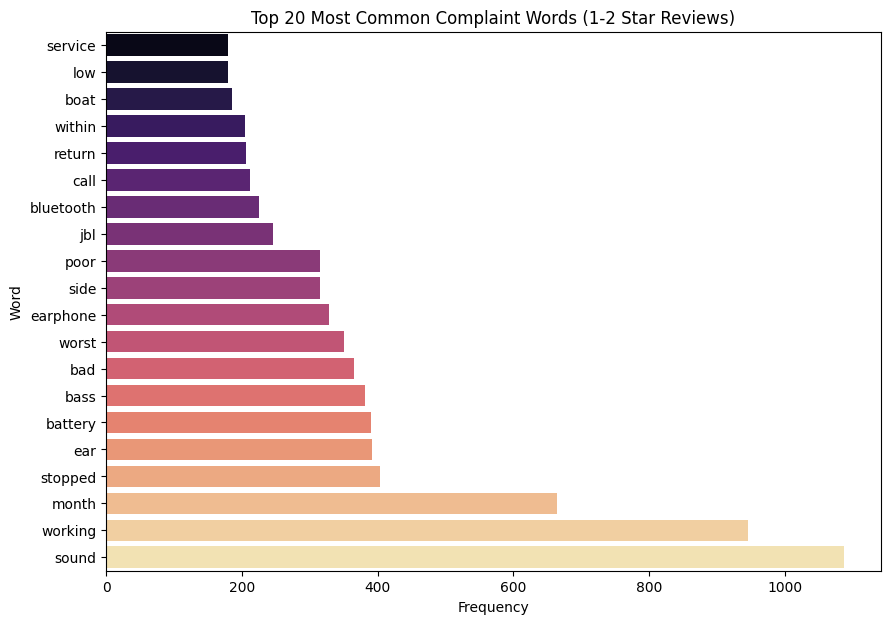

In [33]:
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count']).sort_values('count', ascending=True)

plt.figure(figsize=(10, 7))
sns.barplot(data=common_words_df, x='count', y='word', palette='magma')
plt.title('Top 20 Most Common Complaint Words (1-2 Star Reviews)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


### **7.   Findings and Conclusion**


*   **Overall Sentiment Distribution (Predicted):** The predicted sentiment distribution shows a clear dominance of positive sentiments. A significantly larger number of reviews were predicted as 'pos' (9987) compared to 'neg' (4348), indicating that the majority of reviews are generally positive.

*   **Overall Sentiment Distribution (Actual/True):** Similarly, the true sentiment distribution, derived from the 'ReviewStar' column (1-2 stars as 'neg', 4-5 stars as 'pos'), also reveals a strong positive bias. There were 9400 reviews classified as 'pos' and 3432 as 'neg'. This alignment between predicted and true sentiments suggests that the VADER model is performing reasonably well in capturing the overall sentiment trend in the dataset.

*   **Most Frequent Star Rating:** The most frequent star rating given by users is **5 stars**, accounting for 6211 occurrences. This reinforces the observation of a predominantly positive user experience and satisfaction with the products being reviewed.

*   **Common Complaints in Negative Reviews (1-2 Stars):** Analysis of the 'ReviewBody' from 1-2 star reviews highlights several recurring issues:
    *   **Performance/Functionality:** 'sound', 'working', 'stopped', 'battery', 'bass', 'poor', 'call' are frequently mentioned, suggesting problems with audio quality, device functionality (e.g., not working, stopping unexpectedly), battery life, and call quality.
    *   **Durability/Reliability:** Words like 'month', 'ear', 'side', 'return', 'within' often appear in contexts indicating short lifespan, issues with specific parts (e.g., earbud), and the need for returns within a short period, pointing to concerns about product durability.
    *   **Negative Experience:** 'bad', 'worst', 'low', 'service' reflect general dissatisfaction, poor overall experience, low performance, and unsatisfactory customer service.

In conclusion, the most of products have a positive review with a a dominant 5-star rating and a high proportion of predicted and true positive sentiments. By the other hand, the negative reviews consistently point to issues related to product functionality, durability, and a generally poor user experience with specific features like sound and battery.